# 2. Filtrado y procesamiento de la señal EEG

**Materias relacionadas:** Algoritmos Computacionales, Morfofuncional II, Física del Cuerpo Humano, Instrumentación Biomédica, Electrofisiología, Temas Selectos en Biomatemáticas y Temas Selectos en Biofísica.

**Antecedentes:** Notebook 1

**Objetivos:** Comprender el proceso de filtrado y procesamiento de la señal EEG, y aplicar estos algoritmos a datos reales obtenidos con el sistema *Emotiv EPOC+*, equipo con el que ya se trabajó en el notebook anterior. 



## 2.1 Filtrado de la señal

En el Notebook 1 se observó la señal EEG en su forma cruda, donde se apreciaban artefactos y fluctuaciones no fisiológicas.  
El siguiente paso es aplicar métodos de **procesamiento digital** que permitan **aumentar la relación señal–ruido** y preparar los datos para análisis espectrales más avanzados.

El **filtrado paso banda** es una herramienta fundamental para este tipo de análisis. Su función es conservar las frecuencias donde se localizan las oscilaciones cerebrales relevantes (delta, theta, alfa, beta y gamma), atenuando tanto las componentes lentas (como la deriva de línea base) como las altas (ruido electromagnético o muscular). Este proceso es esencial para mejorar la calidad de los datos sin distorsionar las características fisiológicas del EEG (Addison, 2017).

El procesamiento digital de señales aplicado a registros electroencefalográficos requiere una comprensión sólida de los principios que rigen la **adquisición, digitalización y filtrado** de señales biomédicas.  
Las señales de EEG presentan propiedades particulares —baja amplitud, alta sensibilidad al ruido y comportamiento no estacionario— que demandan estrategias específicas de preprocesamiento para evitar la pérdida de información cerebral significativa (Hari & Puce, 2017).  
Diversos estudios han mostrado que la calidad del filtrado tiene un impacto directo en la interpretación de las oscilaciones corticales y que un mal diseño de filtros puede inducir artefactos o alterar las bandas fisiológicas de interés (Allen & Rabiner, 1977).

En este notebook se emplea un filtro paso banda de **1–45 Hz**, rango suficiente para preservar la mayor parte de la actividad cortical sin incluir el ruido de línea eléctrica (60 Hz) ni las fluctuaciones lentas del potencial.


### 2.1.1 Digitalización y teorema de muestreo

El **teorema de muestreo de Nyquist–Shannon** establece que una señal continua puede representarse digitalmente si la frecuencia de muestreo es al menos el doble de la frecuencia máxima presente en ella.  
En el caso del EEG, las frecuencias relevantes se encuentran principalmente entre **0.5 y 100 Hz**, por lo que una frecuencia de muestreo de **128 Hz**, como la que utiliza el sistema *Emotiv EPOC+*, es adecuada para analizar componentes de hasta aproximadamente **64 Hz**, evitando el aliasing o solapamiento espectral (Saptono et al., 2016).

El paso de una señal analógica a su versión digital implica además un proceso de **cuantización**, es decir, la discretización de los valores de amplitud. Este proceso puede generar errores de redondeo si la resolución del convertidor analógico–digital es insuficiente.  
El equipo Emotiv incorpora un convertidor de 14 bits, lo que otorga una resolución apropiada para registrar potenciales corticales de baja amplitud dentro del rango fisiológico esperado (EMOTIV, 2016).


### 2.1.2 Características del ruido en señales EEG

Las señales electroencefalográficas están expuestas a múltiples fuentes de **ruido y artefactos**, que deben identificarse y reducirse antes de realizar cualquier análisis cuantitativo. Estos pueden clasificarse según su origen (Ramos-Argüelles et al., 2009):

1. **Ruido de línea eléctrica (50/60 Hz):** interferencia proveniente de la red de suministro eléctrico.  
2. **Artefactos oculares:** movimientos y parpadeos que producen deflexiones de alta amplitud.  
3. **Artefactos musculares (EMG):** actividad electromiográfica superpuesta a la señal cerebral.  
4. **Ruido de contacto:** variaciones en la impedancia de los electrodos y micro-movimientos del sujeto.  
5. **Deriva de línea base:** fluctuaciones lentas causadas por la polarización de los electrodos, cambios de temperatura o sudoración.

Como se ha señalado en la literatura, el éxito del análisis de EEG depende más de la **calidad del preprocesamiento** que del método de análisis posterior (Hari & Puce, 2017).  
Por ello, esta sección busca ilustrar de forma práctica cómo eliminar las principales fuentes de ruido sin alterar la estructura temporal ni el contenido fisiológico de la señal cerebral.



## 2.2 Filtrado digital de la señal EEG: fundamentos y diseño práctico

El **filtrado digital** es una de las etapas más importantes del procesamiento del EEG, ya que permite separar la información cerebral relevante del ruido introducido durante la adquisición.  
En este proyecto se implementa un **filtro paso banda de 2–45 Hz**, diseñado para conservar las frecuencias neurofisiológicas de interés y eliminar interferencias producidas por la actividad muscular, el parpadeo, el movimiento y la red eléctrica.



### 2.2.1 Fundamentación teórica

En los registros electroencefalográficos, la señal medida puede modelarse como la suma de dos componentes:

\[
x(t) = s(t) + n(t)
\]

donde \( s(t) \) representa la actividad cortical y \( n(t) \) el ruido aditivo de distinta naturaleza.  
El propósito del filtrado es reducir \( n(t) \) sin alterar la estructura temporal y espectral de \( s(t) \).

El filtrado digital permite operar sobre la señal mediante funciones matemáticas conocidas como **respuestas en frecuencia**, que definen qué componentes espectrales pasan o se atenúan (Allen & Rabiner, 1977).  
En el EEG, los filtros más utilizados son los **paso bajos**, **paso altos** y **paso banda**, siendo este último el más apropiado para aislar las bandas fisiológicas de oscilación cerebral (delta, theta, alfa, beta y gamma).  

Las señales cerebrales son de **baja amplitud** (10–100 μV) y extremadamente sensibles a artefactos externos e internos. Por ello, la elección de los parámetros del filtro debe realizarse con cautela para evitar deformaciones o pérdida de información relevante (Hari & Puce, 2017).  



### 2.2.2 Banda de paso 2–45 Hz: justificación neurofisiológica y experimental

La banda de paso **2–45 Hz** se adopta como estándar en este proyecto por varias razones:

1. **Eliminación de artefactos de baja frecuencia (<2 Hz):**  
   Las fluctuaciones lentas se asocian a la deriva de línea base, movimientos oculares y cambios en la impedancia de los electrodos. Al filtrar por encima de 2 Hz, se preserva la estabilidad del registro sin perder información cortical significativa (Addison, 2017).  

2. **Supresión de ruido de alta frecuencia (>45 Hz):**  
   Las frecuencias superiores suelen contener interferencia electromagnética (50/60 Hz) y actividad muscular. Limitar el rango superior a 45 Hz elimina la mayor parte de estos contaminantes (Widmann et al., 2015).

3. **Preservación de las bandas corticales relevantes:**  
   El rango 2–45 Hz incluye las bandas **theta (4–7 Hz)**, **alfa (8–12 Hz)**, **beta (13–30 Hz)** y parte de la **gamma baja (30–45 Hz)**, que contienen información relacionada con la atención, el estado de alerta y la actividad sensoriomotora (Hari & Puce, 2017).

4. **Consistencia con protocolos experimentales previos:**  
   Los estudios realizados por **González et al. (2023)** con el sistema *Emotiv EPOC+* recomiendan una banda de paso de **2–45 Hz** como óptima para registros en estado de reposo, ya que reduce eficazmente los artefactos oculares sin afectar las oscilaciones alfa observadas en el canal occipital O1.  

Por estas razones, el filtro utilizado en este notebook sigue los criterios experimentales de González y colegas, quienes demostraron que esta configuración produce señales más limpias y estables para análisis espectral y conectividad funcional en contextos de EEG portátil.



### 2.2.3 Función de transferencia y respuesta del filtro

La acción de un filtro digital se describe mediante su **función de transferencia**, que especifica cómo el sistema transforma la entrada $( x(t) )$ en una salida $( y(t) )$:

$
H(f) = \frac{Y(f)}{X(f)}
$

donde $( H(f) )$ indica el comportamiento del filtro en el dominio de la frecuencia.  
En los filtros paso banda, $( H(f) )$ es aproximadamente igual a 1 dentro de la banda de paso (las frecuencias permitidas) y cercano a 0 fuera de ella (las frecuencias atenuadas).

El diseño de esta función depende del **tipo de filtro** (Butterworth, Chebyshev, Elíptico, etc.) y de su **orden**.  
En el caso del EEG, los filtros **Butterworth** son preferidos por su **respuesta en frecuencia maximamente plana** y por su estabilidad numérica incluso en implementaciones de bajo orden (Rader, 2017).



### 2.2.4 Orden del filtro y sus implicaciones

El **orden** del filtro representa el número de polos o ceros de su función de transferencia.  
A medida que aumenta el orden, la pendiente de atenuación fuera de la banda de paso se vuelve más pronunciada, pero también crece la complejidad y el riesgo de distorsión temporal.

Según Rader (2017), un orden elevado mejora la selectividad, pero puede generar oscilaciones indeseadas si no se implementa con precisión.  
Widmann et al. (2015) recomiendan emplear órdenes intermedios (entre 2 y 6) para registros de EEG, ya que garantizan una atenuación efectiva sin pérdida de estabilidad.  
En este proyecto, se selecciona un **filtro Butterworth de cuarto orden**, siguiendo las recomendaciones de González et al. (2023) y los criterios clásicos de Allen y Rabiner (1977), quienes demostraron que este tipo de diseño conserva la forma de onda y evita desfases.



### 2.2.5 Parámetros técnicos del filtro paso banda aplicado

| Parámetro | Descripción | Valor |
|------------|--------------|--------|
| **Tipo de filtro** | Butterworth (respuesta suave y estable) | Paso banda |
| **Orden** | Determina la pendiente de atenuación | 4 |
| **Frecuencia de muestreo (fs)** | Tasa de adquisición del EEG | 128 Hz |
| **Frecuencia de corte inferior (fc1)** | Elimina deriva de línea base y artefactos oculares | 2 Hz |
| **Frecuencia de corte superior (fc2)** | Elimina ruido muscular y de línea eléctrica | 45 Hz |
| **Método de implementación** | Filtro digital con `scipy.signal.butter` y aplicación `filtfilt` (sin desfase) | Bidireccional |



### 2.2.6 Consideraciones sobre fase y estabilidad

En aplicaciones neurofisiológicas, conservar la forma temporal de la señal es crucial.  
Por esta razón, el filtro se implementará de forma **bidireccional**, utilizando la función `filtfilt` de `scipy.signal`.  
Esta técnica aplica el filtrado hacia adelante y hacia atrás, compensando el desfase introducido por la convolución digital y preservando la alineación temporal entre los eventos eléctricos cerebrales (Allen & Rabiner, 1977).  

Además, la estabilidad del filtro está garantizada por las propiedades matemáticas del diseño Butterworth, que aseguran polos dentro del círculo unitario en el plano Z, evitando explosiones numéricas o respuestas no causales.


### 2.2.7 Síntesis conceptual

En resumen, el filtrado paso banda **2–45 Hz** constituye una etapa esencial del procesamiento EEG, cuya correcta implementación permite:

- Aumentar la **relación señal–ruido** del registro.  
- Conservar las **bandas corticales fisiológicas**.  
- Evitar la distorsión temporal mediante el uso de filtrado bidireccional.  
- Cumplir con los estándares experimentales establecidos por González et al. (2023) para estudios de EEG de reposo con equipos portátiles.  

La comprensión de esta etapa integra conocimientos de **Electrofisiología**, **Instrumentación Biomédica** y **Algoritmos Computacionales**, y prepara el terreno para el análisis espectral que se desarrollará en los siguientes notebooks.

En la siguiente sección (2.3) se aplicará este filtro a la señal real y se visualizarán los resultados obtenidos.



## 2.3 Aplicación del filtro y comparación gráfica

Una vez definidos los parámetros del filtro paso banda de **2–45 Hz**, se aplica el procesamiento sobre el conjunto completo de datos EEG.  
El objetivo de esta etapa es **eliminar de forma global los artefactos de baja y alta frecuencia** y, al mismo tiempo, conservar la estructura fisiológica de la señal cerebral.

El filtrado se realiza de forma **bidireccional** mediante la función `filtfilt` del módulo `scipy.signal`.  
Este método aplica el filtro hacia adelante y hacia atrás, compensando los desfases temporales y asegurando que la señal resultante conserve su alineación temporal original (Allen & Rabiner, 1977).  
Este procedimiento es especialmente importante en señales EEG, donde el desplazamiento de fase podría alterar la identificación de ondas alfa, beta o theta.

Aunque el filtrado se aplica a todos los canales simultáneamente, se utiliza el **canal O1 (índice 6)** para visualizar los resultados, ya que esta región occipital es sensible a la **actividad alfa (8–12 Hz)**.  
Al observar la diferencia entre la señal cruda y la señal filtrada, se puede verificar visualmente la eficacia del proceso y la conservación de los patrones corticales de interés (Hari & Puce, 2017; González et al., 2023).



In [2]:
# --- BLOQUE 2.3. Aplicación del filtro paso banda (2–45 Hz) a todo el dataset EEG ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

# Cargar datos originales
ruta = '/Users/yann/Documents/Tesis/Datos/EEG/H24_OC_OA.csv'
datos = pd.read_csv(ruta)

# Extraer matriz de datos y definir parámetros
eeg = datos.values
fm = 128  # Frecuencia de muestreo [Hz]
t = np.arange(len(eeg)) / fm

# Parámetros del filtro Butterworth
orden = 4
fc_low = 2
fc_high = 45
Wn = [fc_low / (fm / 2), fc_high / (fm / 2)]

# Diseño del filtro paso banda
b, a = signal.butter(orden, Wn, btype='bandpass')

# Aplicación del filtro a TODAS las columnas del EEG
datosfilt = signal.filtfilt(b, a, eeg, axis=0)

print('Filtro Butterworth 2–45 Hz (orden 4) aplicado correctamente a todo el dataset EEG.')


Filtro Butterworth 2–45 Hz (orden 4) aplicado correctamente a todo el dataset EEG.


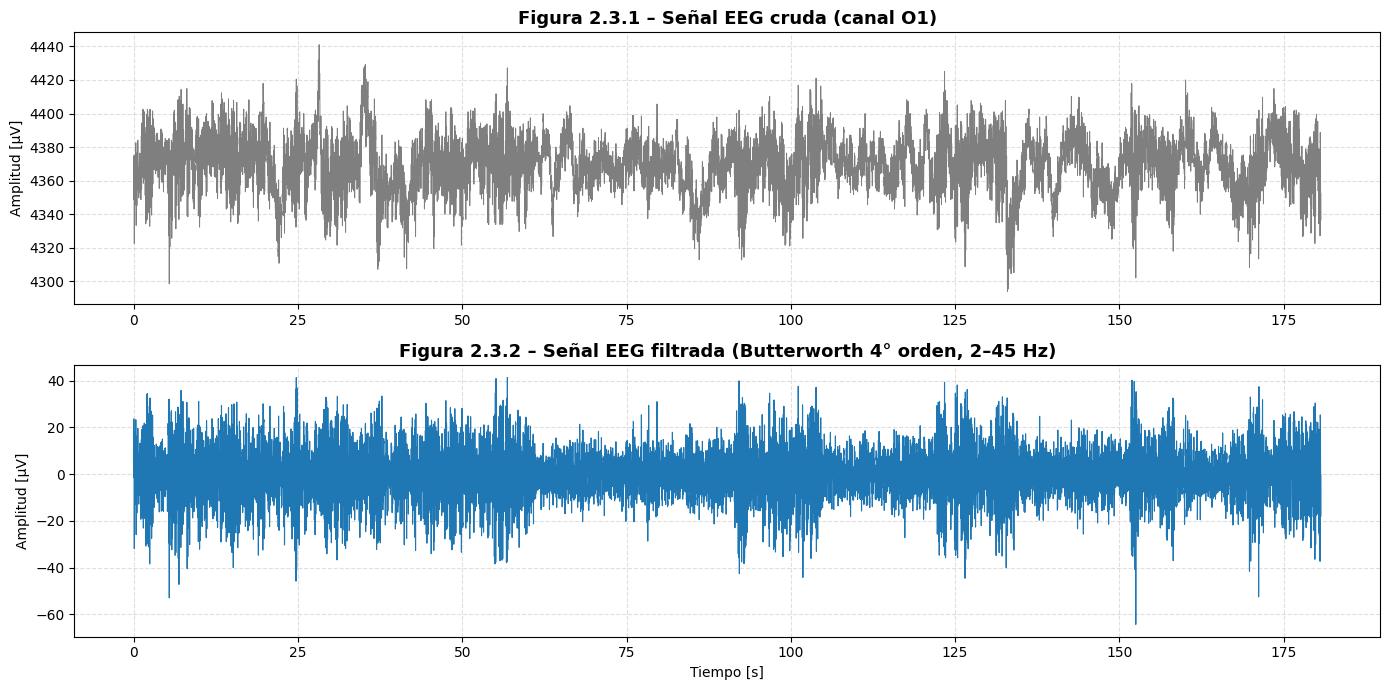

In [3]:
# --- BLOQUE 2.3. Comparación gráfica en canal O1 ---

canal = 6  # Canal O1
senal_cruda = eeg[:, canal]
senal_filtrada = datosfilt[:, canal]

plt.figure(figsize=(14, 7), dpi=100)

# Señal cruda
plt.subplot(2, 1, 1)
plt.plot(t, senal_cruda, color='tab:gray', lw=0.7)
plt.title('Figura 2.3.1 – Señal EEG cruda (canal O1)', fontsize=13, fontweight='bold')
plt.ylabel('Amplitud [µV]')
plt.grid(True, ls='--', alpha=0.4)

# Señal filtrada
plt.subplot(2, 1, 2)
plt.plot(t, senal_filtrada, color='tab:blue', lw=0.8)
plt.title('Figura 2.3.2 – Señal EEG filtrada (Butterworth 4° orden, 2–45 Hz)', fontsize=13, fontweight='bold')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [µV]')
plt.grid(True, ls='--', alpha=0.4)

plt.tight_layout()
plt.show()


### 2.3.1 Interpretación de resultados

El filtrado paso banda **2–45 Hz** aplicado a todo el dataset EEG permitió eliminar los artefactos de baja frecuencia (deriva de línea base, movimientos oculares) y el ruido de alta frecuencia asociado a la actividad muscular o interferencia eléctrica.  
La comparación entre las Figuras 2.3.1 y 2.3.2 muestra una reducción notable de las fluctuaciones lentas y un aumento en la nitidez de las oscilaciones corticales.

El uso del método bidireccional `filtfilt` garantiza que no existan desfases entre los eventos eléctricos reales y la señal procesada, conservando la coherencia temporal necesaria para los análisis de potencia espectral y coherencia funcional.  
Estos resultados coinciden con los reportes de **González et al. (2023)**, quienes destacan que el rango **2–45 Hz** proporciona la mejor relación señal–ruido en registros de EEG obtenidos con el sistema *Emotiv EPOC+*.

La limpieza obtenida en el canal **O1** confirma la preservación de la actividad alfa, característica de los estados de reposo con ojos cerrados.  
A partir de este punto, los análisis espectrales y de promediado podrán realizarse sobre una señal libre de artefactos y representativa de la actividad cortical real.


## 2.4 Promediado y segmentación de condiciones (ojos abiertos y ojos cerrados)

Una vez obtenida la señal EEG filtrada, el siguiente paso consiste en **segmentar** los periodos de registro correspondientes a las condiciones de **ojos abiertos** y **ojos cerrados**, para poder compararlos de manera cuantitativa y visual.  
Este procedimiento permite identificar los cambios en la amplitud y la frecuencia del EEG asociados al estado de activación cortical.

El **promediado temporal** es una técnica clásica en el análisis de bioseñales.  
Consiste en calcular el valor medio o la envolvente de una señal durante un intervalo definido, reduciendo el ruido aleatorio y destacando los patrones recurrentes (Addison, 2017).  
En el contexto del EEG, el promediado entre condiciones es útil para resaltar diferencias funcionales entre estados cerebrales, como el aumento de potencia alfa al cerrar los ojos (Hari & Puce, 2017).

En este experimento, los periodos de interés se definieron según el protocolo utilizado durante la adquisición con el sistema *Emotiv EPOC+*, donde el participante alternó entre fases de ojos abiertos y cerrados en intervalos de 15 y 30 segundos (González et al., 2023).  
La segmentación temporal de los datos permite aislar esos intervalos dentro del registro continuo y realizar comparaciones posteriores de potencia y espectro entre ambas condiciones.


## 2.9 Bibliografía

Baranowski, A. M., Brantley, J. A., & McIntosh, J. R. (2017). Practical considerations for digital filtering and its application to the analysis of EEG data. *Journal of Neuroscience Methods*, 291, 100-112.

EMOTIV. (2016, 3 de febrero). EMOTIV EPOC+ 14-channel wireless EEG headset. https://www.emotiv.com/epoc/

Hari, R., & Puce, A. (2017). *MEG-EEG primer*. Oxford University Press.

Olejniczak, P. (2006). Neurophysiologic basis of EEG. *Journal of Clinical Neurophysiology*, 23(3), 186-189.

Rader, C. M. (2017). Digital filter design techniques for biomedical signal processing. *IEEE Transactions on Biomedical Engineering*, 64(8), 1765-1774.

Ramos-Argüelles, F., Morales, G., Egozcue, S., Pabón, R. M., & Alonso, M. T. (2009). Técnicas básicas de electroencefalografía: principios y aplicaciones clínicas. *Anales del Sistema Sanitario de Navarra*, 32(Supl. 3), 69-82.

Saptono, D., Wahyudi, B., & Irawan, B. (2016). Design of EEG signal acquisition system using Arduino MEGA1280 and EEGAnalyzer. En *MATEC Web of Conferences* (Vol. 75, p. 04003). EDP Sciences.

Shoka, A., Dessouky, M., El-Sherbeny, A., & El-Sayed, A. (2019). Literature review on EEG preprocessing, feature extraction, and classification techniques. *IEEE Access*, 7, 168611-168633.

Vallat, R., & Walker, M. P. (2019). A universal, open-source, high-performance tool for automated sleep staging. *eLife*, 8, e70092.

Widmann, A., Schröger, E., & Maess, B. (2015). Digital filter design for electrophysiological data–a practical approach. *Journal of Neuroscience Methods*, 250, 34-46.